##### Author : 문범수
##### date : 2023-09-24
##### title : 0917 수업 복습

# 결측치, 누락값 & 이상치

### 데이터 분석에서 결측치와 누락값은 정말 중요
- 결측치 : 실제 Na 값이지만 정말 Na값일 수 있다. survay -> 어떤 문항은 내가 선택하지 않은 문항 na
- 결측치가 정말 순수하게 결측치의미인가 아니면 na값 자체가 값일 수 있는 것
- 누락값 : 휴먼에러로 인한 누락값, 어떤 이유로 누락이 되었는지?

- 공통적으로 이야기하는 것은 : 값이 없음. NA, NaN data에 보일 것

- 결측치 누락값 처리 이유 : 분석에 방해
- Na 결측치, 누락값이라 생각된다면 -> Na값을 머신에게 학습시키기 위해 처리한다.

- Na 값의 중요도
- 시험성적 data[100,50,60,30,50,30] 이 data로 평균을 알 수 있지만
- 시험 성적 data[100,50,x,x,50,30]이 누락 되었다.

- x값이 실제의 값과 가장 유사하게 대입되면 가장 실제값과 예측값이 같아지는 것

- 결측치가 정말 중요하고 단순하게 접근해야 할 범위는 아니다.
- 결측치를 실제값과 유사하게 하지 않는다면 -> 결국에는 차이 발생 -> 모델 성능 하락

### 결측치 처리 방법

- 1. 가장 간단한 건 날린다. 버린다. 결측치 날린다.
    - 결측치를 날리는 기준 : 결측치가 전체 비중에 1%미만 정도면 쉽게 날린다. 하지만 절대값에 따라 달라짐
    
- 2. 결측치가 상당한 비중을 차지하는 이유 : 전체 data set 컬럼에서 30% 40% 결측치가 있다.
    - 결측치를 우린 어떤 기준으로 처리 하는가?
    - 다 날린다 -> 머신에게 학습을 data 양 감소
    - 성능에 영향
    - 결측치를 최대한 채워서 메꾸는 형식 고안
   
- 3. 너무 data가 다 결측치면 그건 날려도 상관 없음. 80 - 90% 다 결측치 column이라면 비즈니스적인 이해관계를 보고 도메인 지식 이용해서 날려야 한다.
    - 결측치를 채울 수 없다면


- 결측치가 이렇게 많은 column에서 단순하게 접근해서 결측치를 대체한다면 평균으로 -> 기온 data라 한다면 날씨는 계절에 대한 영향을 고려할 수 없게 됨.

- 결측치는 단순하게 생각할 문제가 아님

- 결측치를 나타내는 용어
- 완전 무작위 결측치 MCAR(Misssing Completely at Random) -> 어떤 인간의 편향이나 기계 결함이 아니라 완전 무작위 랜덤한 것
- 무작위 결측 MAR(Missing At Random) : 어떤 상황으로 인해 발생하는 경우, 기업에서 제조과정에서 문제가 생기는 경우, 그 문제가 발생한 곳의 결측치
- 비무작위 결측 NMAR(Misiing At Not Random) : 결측값인데 정말 Na가 하나의 특성이 될 수 있는 survay

### 결측치 처리 방법
- 결측치 날리고 제외하고 진행
- 평균, 중위값, 등등 어떤 특정 통계 값으로 대체
- 보간범(Interpolation)
- 대부분 보간법에 좀 많은 시간을 보냄
- 선형보간 Spline 보간법, time 시계열 보간법 등등

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\munbe\anaconda3\python.exe -m pip install --upgrade pip' command.


In [32]:
## data 불러와서 결측치 보기

import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [33]:
df = pd.read_csv("bike_sharing_daily.csv")

In [34]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,NaN,0.590000,0.155471,644.0,2451.0,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341
729,730,2012-12-30,1,1,12,0,0,0,1,NaN,0.231700,0.483333,0.350754,364.0,1432.0,1796


In [35]:
df.isna().sum() #na값 갯수는 몇개?

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp          17
atemp         24
hum           25
windspeed     13
casual        11
registered    11
cnt            0
dtype: int64

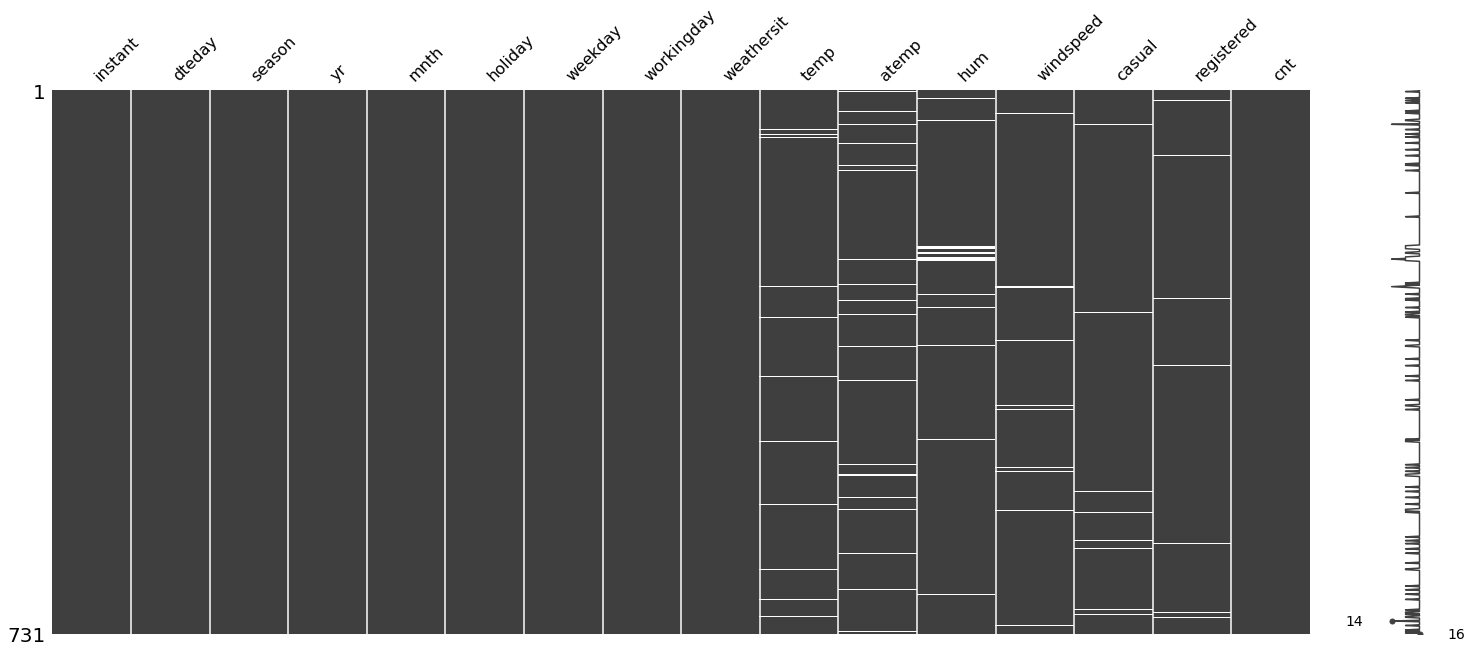

In [37]:
#결측치 시각화
msno.matrix(df)
plt.show()

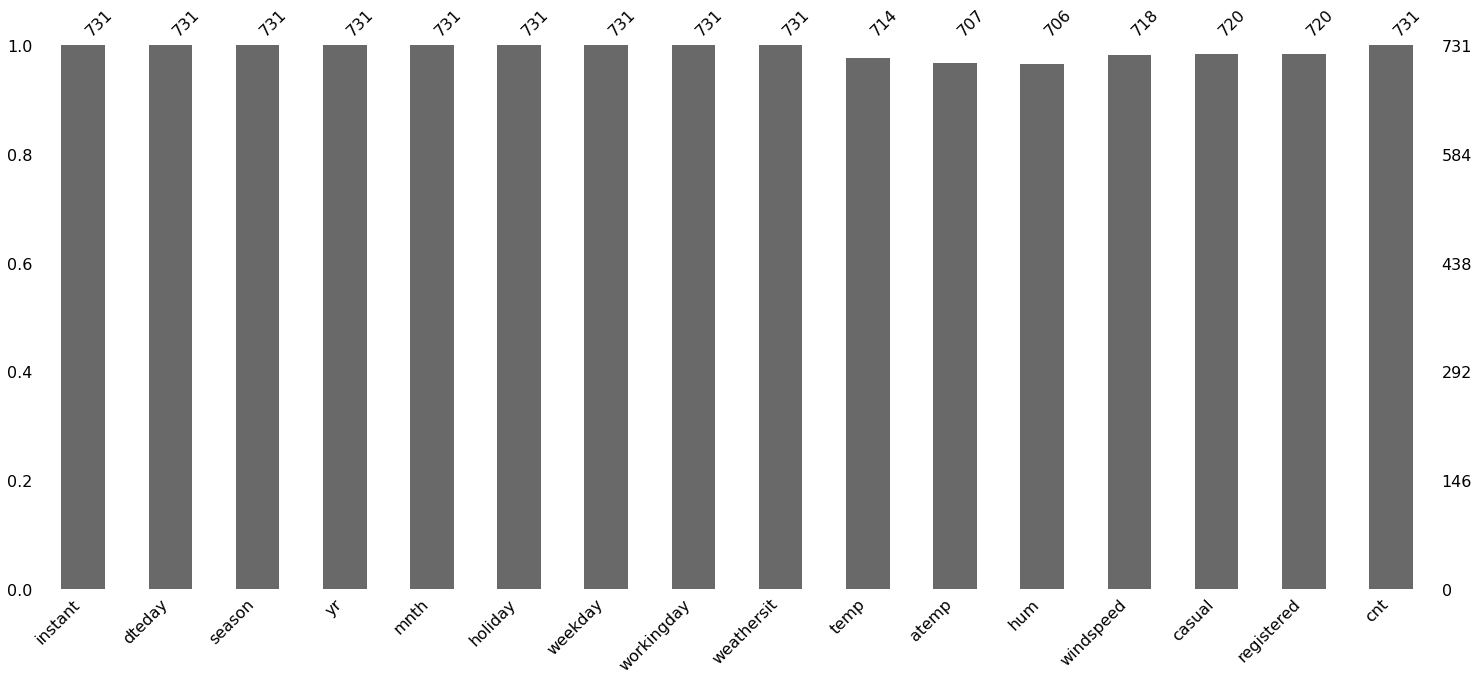

In [39]:
#막대그래프
msno.bar(df)
plt.show()

## 결측치를 대체하는 법
- 샘플 data만 뽑아서 어떤 식으로 작동하는지 확인

In [7]:
dfe = pd.read_csv("country_timeseries.csv")

In [8]:
dfe

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


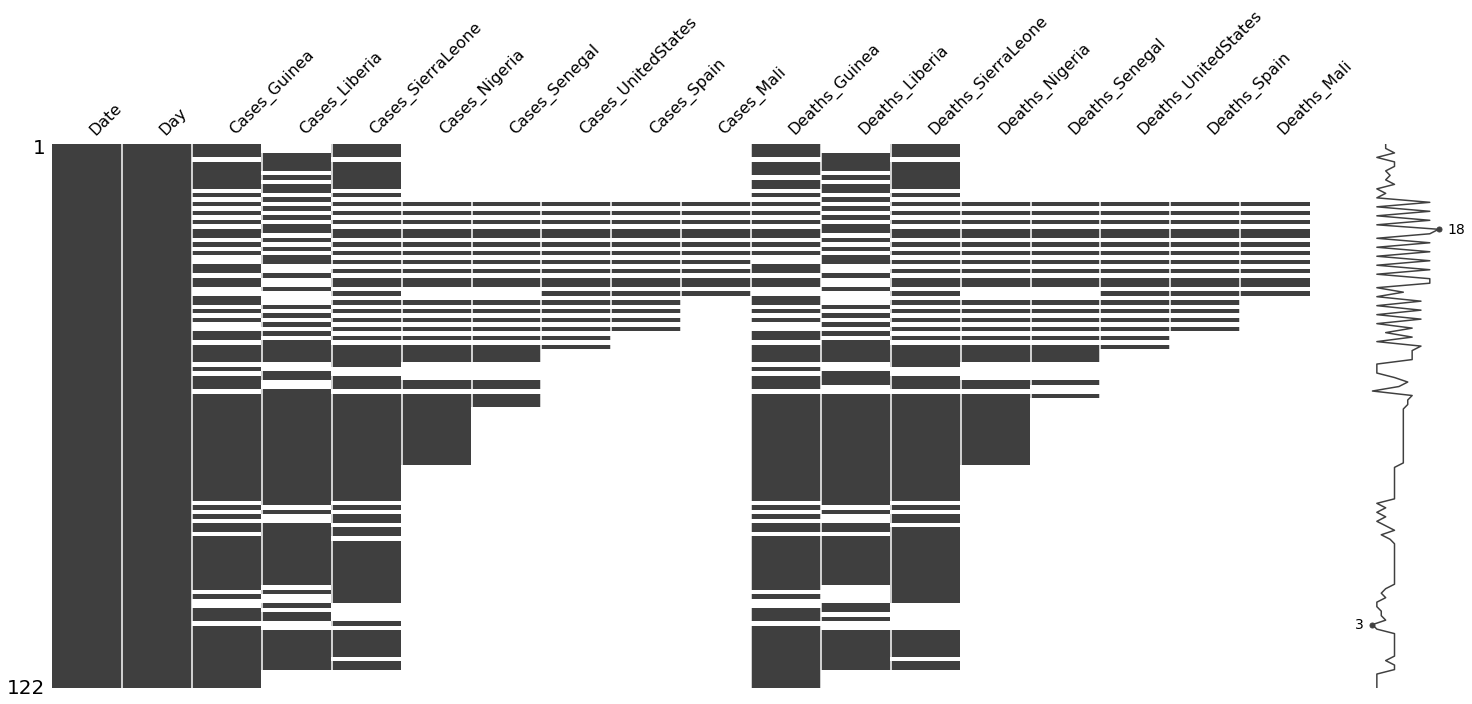

In [40]:
#결측치 시각화
msno.matrix(dfe)
plt.show()

In [9]:
ebola = dfe.iloc[0:15,0:5] #결측치가 어떤식으로 바뀌는지 확인

In [10]:
ebola.dropna() # data가 깔끌하게 정리는 된다.

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
2,1/3/2015,287,2769.0,8166.0,9722.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
7,12/24/2014,277,2630.0,7977.0,9203.0
9,12/20/2014,272,2571.0,7862.0,8939.0


- fillna(method = '') 문법

In [11]:
ebola['Cases_Liberia'].mean()

7960.111111111111

In [12]:
ebola['Cases_Liberia'].fillna(7960.111111111111).to_frame()

,Cases_Liberia
0,7960.111111
1,7960.111111
2,8166.000000
3,8157.000000
4,8115.000000
5,8018.000000
6,7960.111111
7,7977.000000
8,7960.111111
9,7862.000000


In [13]:
# case liberia 0으로 대체
ebola['Cases_Liberia'].fillna(0).to_frame()
# 원본 data는 유지

,Cases_Liberia
0,0.0
1,0.0
2,8166.0
3,8157.0
4,8115.0
5,8018.0
6,0.0
7,7977.0
8,0.0
9,7862.0


- ffill : 누락값이 나타나기 이전의 값으로 누락값을 변경
- bfill : 누락값이 나타난 이후의 첫번째 값으로 앞쪽의 누락값 변경

In [14]:
ebola['Cases_Liberia'].fillna(method='ffill').to_frame()

,Cases_Liberia
0,NaN
1,NaN
2,8166.0
3,8157.0
4,8115.0
5,8018.0
6,8018.0
7,7977.0
8,7977.0
9,7862.0


In [15]:
ebola.Cases_Liberia.to_frame()

,Cases_Liberia
0,NaN
1,NaN
2,8166.0
3,8157.0
4,8115.0
5,8018.0
6,NaN
7,7977.0
8,NaN
9,7862.0


In [16]:
ebola['Cases_Liberia'].fillna(method='bfill').to_frame()

,Cases_Liberia
0,8166.0
1,8166.0
2,8166.0
3,8157.0
4,8115.0
5,8018.0
6,7977.0
7,7977.0
8,7862.0
9,7862.0


- 문법
- 보간법(interpolate)
- interpolate(method = '')
- 누락값 사이의 값을 평균으로 대체해서 만든다.

In [17]:
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,NaN,10030.0
1,1/4/2015,288,2775.0,NaN,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,NaN,8157.0,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,NaN,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,NaN,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [18]:
ebola['Cases_Liberia'].interpolate().to_frame()

,Cases_Liberia
0,NaN
1,NaN
2,8166.0
3,8157.0
4,8115.0
5,8018.0
6,7997.5
7,7977.0
8,7919.5
9,7862.0


In [41]:
ebola['Cases_Liberia'].fillna(method='bfill').to_frame()

,Cases_Liberia
0,8166.0
1,8166.0
2,8166.0
3,8157.0
4,8115.0
5,8018.0
6,7977.0
7,7977.0
8,7862.0
9,7862.0


### 보간법에서
method must be one of ['linear', 'time', 'index', 'values', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'barycentric', 'krogh', 'spline', 'polynomial', 'from_derivatives', 'piecewise_polynomial', 'pchip', 'akima', 'cubicspline']. Got 'dfas' instead.

- 사용되는 문법들

<AxesSubplot:>

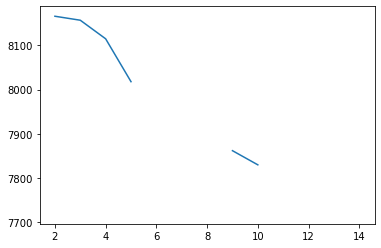

In [42]:
# 결측값이 있는 경우는 뚝 떨어진 값이 된다.
ebola['Cases_Liberia'].plot()

<AxesSubplot:>

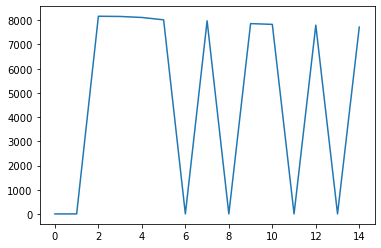

In [43]:
# 결측값이 있는 경우는 뚝 떨어진 값이 된다.
ebola['Cases_Liberia'].fillna(0).plot()

<AxesSubplot:>

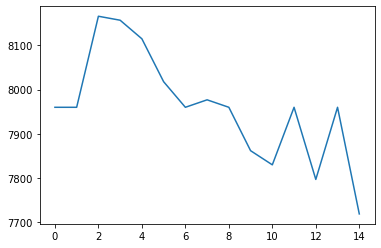

In [21]:
ebola['Cases_Liberia'].fillna(7960.111111111111).plot()

<AxesSubplot:>

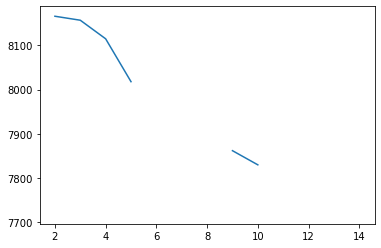

In [44]:
# 결측값이 있는 경우는 뚝 떨어진 값이 된다.
ebola['Cases_Liberia'].plot()

- 선형 보간법
- 두 점사이의 거리 구하는 공식
- 1차원 두 점사이의 거리로 해당 누락값을 대체한다.

<AxesSubplot:>

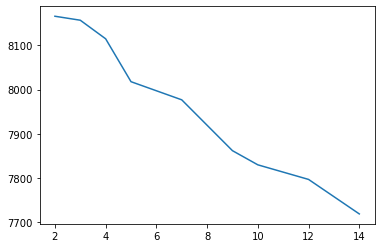

In [22]:
ebola['Cases_Liberia'].interpolate(method = 'linear').plot()

<AxesSubplot:>

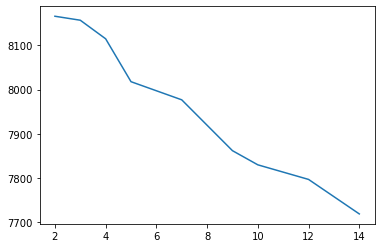

In [23]:
# 1차, 2차, 3차 항을 높이면서 보간
ebola['Cases_Liberia'].interpolate(method = 'linear').plot()

<AxesSubplot:>

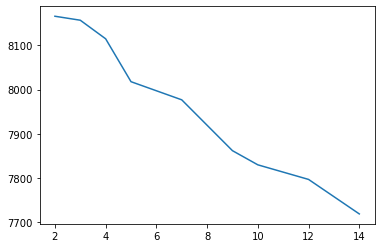

In [24]:
ebola['Cases_Liberia'].interpolate(method = 'slinear').plot() 

<AxesSubplot:>

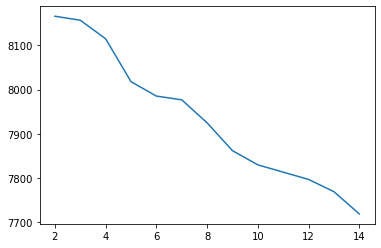

In [25]:
ebola['Cases_Liberia'].interpolate(method = 'cubic').plot()

<AxesSubplot:>

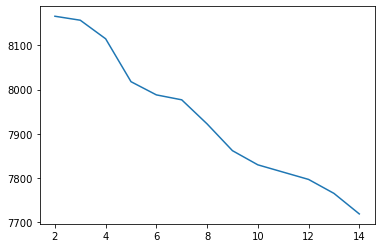

In [26]:
#spline
# 기존에는 1차원 보간
# spline 통해서 order 차수 높이면
# 2차원 이상

ebola['Cases_Liberia'].interpolate(method = 'spline', order = 2).plot()

In [27]:
dfe['Date'] = pd.to_datetime(dfe['Date'])

df_e = dfe.set_index('Date')

In [28]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [45]:
# time에 따른 결측치 대체
df_e.iloc[0:15,0:5]['Cases_Liberia'].interpolate(method = 'time').to_frame()
# 시계열로 대체를 할 때는 양쪽의 값을 가지고 Na값을 대체하기 때문에 

,Cases_Liberia
Date,
2015-01-05,NaN
2015-01-04,NaN
2015-01-03,8166.000000
2015-01-02,8157.000000
2014-12-31,8115.000000
2014-12-28,8018.000000
2014-12-27,8007.750000
2014-12-24,7977.000000
2014-12-21,7890.750000


In [30]:
ebola['Cases_Liberia']

0        NaN
1        NaN
2     8166.0
3     8157.0
4     8115.0
5     8018.0
6        NaN
7     7977.0
8        NaN
9     7862.0
10    7830.0
11       NaN
12    7797.0
13       NaN
14    7719.0
Name: Cases_Liberia, dtype: float64

보간법, 결측치, 예상값을 위한 전처리 과정과 개념에 대해 공부할 것
향후 매출 data를 통해 예상 매출액을 구할 수 있는지 프로젝트에 적용 예정
시계열 분석을 좀 더 공부해보자